In [1]:
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import LineCollection
import matplotlib as mpl
from matplotlib.colors import rgb2hex
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.cm as cm
import matplotlib.colors as colors
import geopandas as gpd
%matplotlib inline

In [2]:
df = pd.read_pickle('boosted_dataset.pkl')

In [3]:
df.head()

,c_street_number,c_street,c_unit,c_city,c_state,c_zip_code,g_county,lat,lon,adj_address,price_per_sqft,price_per_sqft_gboost,price,sqft,bathrooms,bedrooms
1,12200,PRATOLINA DRIVE,None,AUSTIN,TX,78739,Travis County,30.186914,-97.928031,12200 PRATOLINA DRIVEAUSTIN TX 78739,155.697824,170.340419,445542.635209,2861.585492,3.348373,4
3,15302,DOROTHY DRIVE,None,AUSTIN,TX,78734,Travis County,30.352751,-97.956798,15302 DOROTHY DRIVEAUSTIN TX 78734,175.621617,194.867737,609196.018461,3468.798588,3.773967,4
4,2515,DREW LANE,None,AUSTIN,TX,78748,Travis County,30.169753,-97.833187,2515 DREW LANEAUSTIN TX 78748,173.795809,185.814928,569972.071712,3279.550145,3.689396,4
5,15404,JOSEPH DRIVE,None,AUSTIN,TX,78734,Travis County,30.354369,-97.957800,15404 JOSEPH DRIVEAUSTIN TX 78734,175.513849,194.867737,605628.175255,3450.600493,3.766416,4
7,11203,RANCH ROAD 2222,None,AUSTIN,TX,78730,Travis County,30.399156,-97.851646,11203 RANCH ROAD 2222AUSTIN TX 78730,250.800338,276.521308,763918.922418,3045.924616,3.250597,3


In [5]:
stops = gpd.read_file('data/Shapefiles_20-_20JANUARY_202018/Stops/Stops.shp')

In [8]:
stops.head()

,STOP_ID,STOP_NAME,STOP_ABBR,STREET_NMB,ON_STREET,AT_STREET,CITY,ZIP,BAY,STOP_TYPE,PLACEMENT,CORNER,STATUS,LATITUDE,LONGITUDE,SOURCE,SOURCEDATE,geometry
0,66,4925 Craigwood/FM 969,CRFMS,004925,CRAIGWOOD,FM 969,AUSTIN,78725,None,Bus Stop,Nearside,Southeast,None,30.284171,-97.659854,Capital Metro,2017-12-19,POINT (628889.9396000002 3351034.7072)
1,252,200 Trinity/2nd,2TRS,000200,TRINITY,2ND,AUSTIN,78701,None,Bus Stop,Mid-Block,Northeast,None,30.263842,-97.740427,Capital Metro,2017-12-19,POINT (621165.1177000003 3348693.0693)
2,462,851 Rutland/Park Village,S1,000851,RUTLAND,PARK VILLAGE,AUSTIN,78758,None,Bus Stop,Mid-Block,Southeast,None,30.365470,-97.697520,Capital Metro,2017-12-19,POINT (625163.6387 3360002.762)
3,466,8740 Lamar/Payton Gin,S1801,008740,LAMAR,PAYTON GIN,AUSTIN,78758,None,Bus Stop,Mid-Block,Southwest,None,30.356809,-97.701066,Capital Metro,2017-12-19,POINT (624833.9000000004 3359038.985400001)
4,467,8630 Lamar/Fairfield,S63,008630,LAMAR,FAIRFIELD,AUSTIN,78758,None,Bus Stop,Farside,Southwest,None,30.355296,-97.703128,Capital Metro,2017-12-19,POINT (624637.5966999996 3358869.0273)


Total number of bus stops: 2572


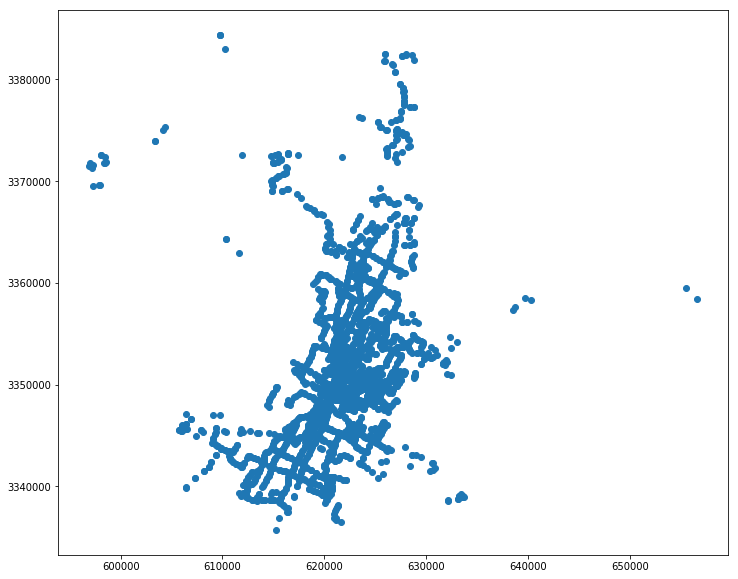

In [25]:
stops.plot(figsize=(12,12));
print('Total number of bus stops: ' + str(stops[stops['STOP_TYPE'] == 'Bus Stop'].shape[0]))

In [ ]:
# Read in data.
colormap = plt.cm.Purples 

aus_stop_file_dir = "data/cb_2017_us_zcta510_500k"
os.chdir(aus_stop_file_dir)

# Austin coordinates.
lowerlon = -98.10 
upperlon = -97.47
lowerlat = 30.11
upperlat = 30.55

fig = plt.figure(figsize=(12,12))
m = Basemap(
    llcrnrlon=lowerlon,
    llcrnrlat=lowerlat,
    urcrnrlon=upperlon,
    urcrnrlat=upperlat,
    projection="lcc",
    resolution="h",
    lat_0=lowerlat,
    lat_1=upperlat,
    lon_0=lowerlon,
    lon_1=upperlon
    )

shp_info = m.readshapefile(os.path.basename(aus_stop_file_dir), 'state')
plt.show()